Tugas B
Definisi Fungsi Line Search Method
- Where to move: Steepest Descent dan Newton Method
- How far to move: armijo + backtracking

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Define the function of three variables
def func(x):
    return x[0]**2 * x[1] + 4 * x[1]**2 - x[1] * x[2] + 1 / x[2]

In [3]:
# Numerical gradient using central difference
def numerical_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = np.copy(x)
        x_backward = np.copy(x)
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (f(x_forward) - f(x_backward)) / (2 * h)
    return grad

# Backtracking line search with Armijo condition
def backtracking_line_search(f, x, p, grad, alpha=1.0, rho=0.5, mu1=1e-4, max_backtrack=20):
    fx = f(x)
    grad_p = grad @ p  # Precompute dot product
    for _ in range(max_backtrack):
        if f(x + alpha*p) <= fx + mu1 * alpha * grad_p:
            return alpha
        alpha *= rho
    return alpha  # Return alpha terakhir jika max_backtrack tercapai

# Steepest descent optimization
def steepest_descent(f, x0, tol=1e-6, max_iter=1000, mu1=1e-4, rho=0.5):
    x = np.asarray(x0, dtype=float)
    assert x.ndim == 1, "x0 harus vektor 1D"
    path = [x.copy()]
    for k in range(max_iter):
        grad = numerical_gradient(f, x)
        if np.linalg.norm(grad) < tol:
            print(f"Konvergensi tercapai pada iterasi {k}.")
            break   
        p = -grad
        alpha = backtracking_line_search(f, x, p, grad, mu1=mu1, rho=rho)
        x = x + alpha * p
        path.append(x.copy())
    else:
        print("Peringatan: Maksimum iterasi tercapai tanpa konvergensi.")
    return x, path

# Numerical Hessian using central difference
def numerical_hessian(f, x, h=1e-5):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            x_ijpp = np.copy(x)
            x_ijpm = np.copy(x)
            x_ijmp = np.copy(x)
            x_ijmm = np.copy(x)
            x_ijpp[i] += h
            x_ijpp[j] += h
            x_ijpm[i] += h
            x_ijpm[j] -= h
            x_ijmp[i] -= h
            x_ijmp[j] += h
            x_ijmm[i] -= h
            x_ijmm[j] -= h
            hessian[i, j] = (f(x_ijpp) - f(x_ijpm) - f(x_ijmp) + f(x_ijmm)) / (4 * h**2)
    return hessian

def newton_method(f, x0, tol=1e-6, max_iter=1000, mu1=1e-4, rho=0.5, h_hessian=1e-5):
    x = np.asarray(x0, dtype=float)
    assert x.ndim == 1, "x0 harus vektor 1D"
    path = [x.copy()]
    for k in range(max_iter):
        grad = numerical_gradient(f, x)
        if np.linalg.norm(grad) < tol:
            print(f"Konvergensi tercapai pada iterasi {k}.")
            break 
        hessian = numerical_hessian(f, x, h=h_hessian)
        hessian += 1e-6 * np.eye(len(x)) * np.linalg.norm(hessian)  # Regularisasi adaptif
        try:
            p = -np.linalg.solve(hessian, grad)
        except np.linalg.LinAlgError:
            print("Peringatan: Hessian singular, fallback ke steepest descent.")
            p = -grad  
        alpha = backtracking_line_search(f, x, p, grad, mu1=mu1, rho=rho)
        x = x + alpha * p
        path.append(x.copy())
    else:
        print("Peringatan: Maksimum iterasi tercapai tanpa konvergensi.")
    return x, path


In [4]:
print("\n" + "="*50 + "\n")
# Initialize the function and starting point
x0 = np.array([1.0, 1.0, 1.0])

print("Metode Steepest Descent")
xmin, path = steepest_descent(func, x0)
path = np.array(path)

print(f"Local minimum point: {xmin}")
print(f"Local minimum value: {func(xmin)}")
print(f"Gradient norm at the local minimum: {np.linalg.norm(numerical_gradient(func, xmin))}")
print(f"Total iterations: {len(path) - 1}")
# Print the last 5 iterations
for i, point in enumerate(path[-5:], start=len(path) - 5):
    print(f"Iteration ke-{i}: {point}")

print("\n" + "="*50 + "\n")

# Run optimization using Newton's Method
print("Metode Newton's Method")
xmin_newton, path_newton = newton_method(func, x0)
path_newton = np.array(path_newton)

print(f"Local minimum point: {xmin_newton}")
print(f"Local minimum value: {func(xmin_newton)}")
print(f"Gradient norm at the local minimum: {np.linalg.norm(numerical_gradient(func, xmin_newton))}")
print(f"Total iterations: {len(path_newton) - 1}")
# Print the last 5 iterations
for i, point in enumerate(path_newton[-5:], start=len(path_newton) - 5):
    print(f"Iteration ke-{i}: {point}")

print("\n" + "="*50 + "\n")





Metode Steepest Descent
Peringatan: Maksimum iterasi tercapai tanpa konvergensi.
Local minimum point: [  -1.39273368  153.30281387 1245.84861898]
Local minimum value: -96687.72462517768
Gradient norm at the local minimum: 454.04140056043684
Total iterations: 1000
Iteration ke-996: [-9.86819252e-01  1.52645525e+02  1.24047430e+03]
Iteration ke-997: [   1.36682985  152.788777   1241.66683928]
Iteration ke-998: [-2.64703440e-01  1.52857091e+02  1.24226367e+03]
Iteration ke-999: [9.99727742e-01 1.53159230e+02 1.24465206e+03]
Iteration ke-1000: [  -1.39273368  153.30281387 1245.84861898]


Metode Newton's Method
Peringatan: Maksimum iterasi tercapai tanpa konvergensi.
Local minimum point: [ 2.14908063 -0.1239375   2.09015881]
Local minimum value: 0.22651237891787607
Gradient norm at the local minimum: 1.6299743725058449
Total iterations: 1000
Iteration ke-996: [ 2.14908189 -0.1239379   2.09015515]
Iteration ke-997: [ 2.14908157 -0.1239378   2.09015607]
Iteration ke-998: [ 2.14908126 -0.12

In [5]:
# Compare the efficiency of the two methods
print("Efficiency Comparison:")

# Convergence behavior
print("\nConvergence Behavior:")
print(f"Steepest Descent converged in {len(path) - 1} iterations.")
print(f"Newton's Method converged in {len(path_newton) - 1} iterations.")

# Computational effort
print("\nComputational Effort:")
print("Steepest Descent requires only gradient computation, making it computationally cheaper per iteration.")
print("Newton's Method involves both gradient and Hessian computations, which are more computationally expensive per iteration.")

# Justification based on convergence behavior
if len(path_newton) - 1 < len(path) - 1:
    print("\nNewton's Method converged faster in terms of iterations, likely due to its use of second-order information.")
else:
    print("\nSteepest Descent required fewer iterations, indicating better performance for this specific problem.")

# Justification based on computational effort
print("\nOverall, the choice between the two methods depends on the trade-off between computational cost per iteration and the total number of iterations required.")

Efficiency Comparison:

Convergence Behavior:
Steepest Descent converged in 1000 iterations.
Newton's Method converged in 1000 iterations.

Computational Effort:
Steepest Descent requires only gradient computation, making it computationally cheaper per iteration.
Newton's Method involves both gradient and Hessian computations, which are more computationally expensive per iteration.

Steepest Descent required fewer iterations, indicating better performance for this specific problem.

Overall, the choice between the two methods depends on the trade-off between computational cost per iteration and the total number of iterations required.


Plot Countur
1. Steepest Descent
2. Newton Method


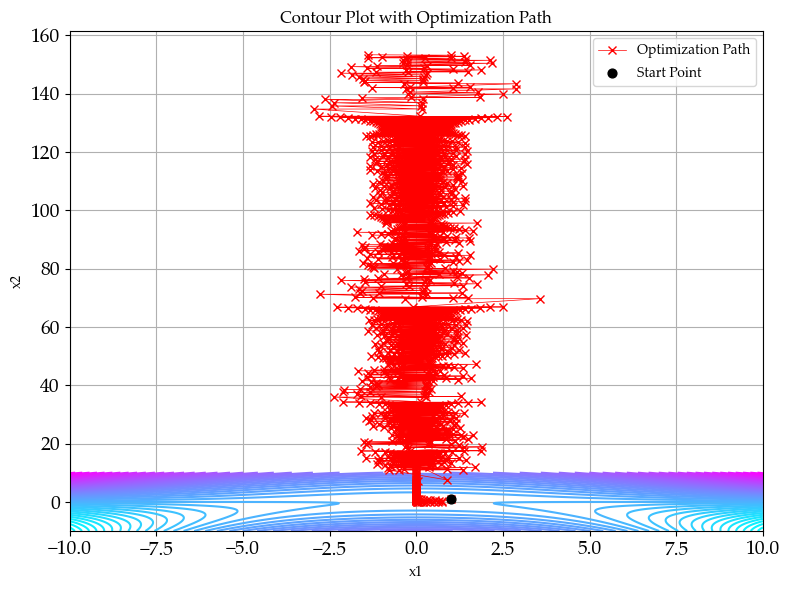

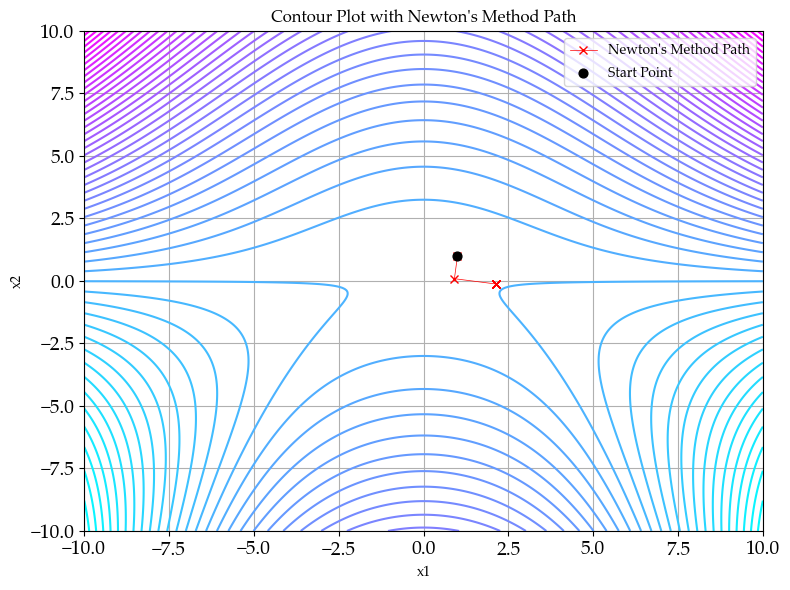

In [6]:
# Create contour plot
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = func([X, Y, 1])

fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(X, Y, Z, levels=50, cmap='cool')
ax.plot(path[:, 0], path[:, 1], marker='x', color='red', linewidth=0.5, label='Optimization Path')
# Add the start point
ax.scatter(x0[0], x0[1], color='black', s=40, label='Start Point', zorder=5)
ax.set_title("Contour Plot with Optimization Path")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()



plt.grid(True)
plt.tight_layout()
plt.show()

# Create contour plot for Newton's Method
fig, ax_newton = plt.subplots(figsize=(8, 6))
CS_newton = ax_newton.contour(X, Y, Z, levels=50, cmap='cool')
ax_newton.plot(path_newton[:, 0], path_newton[:, 1], marker='x', color='red', linewidth=0.5, label="Newton's Method Path")
# Add the start point
ax_newton.scatter(x0[0], x0[1], color='black', s=40, label='Start Point', zorder=5)
ax_newton.set_title("Contour Plot with Newton's Method Path")
ax_newton.set_xlabel('x1')
ax_newton.set_ylabel('x2')
ax_newton.legend()



plt.grid(True)
plt.tight_layout()
plt.show()

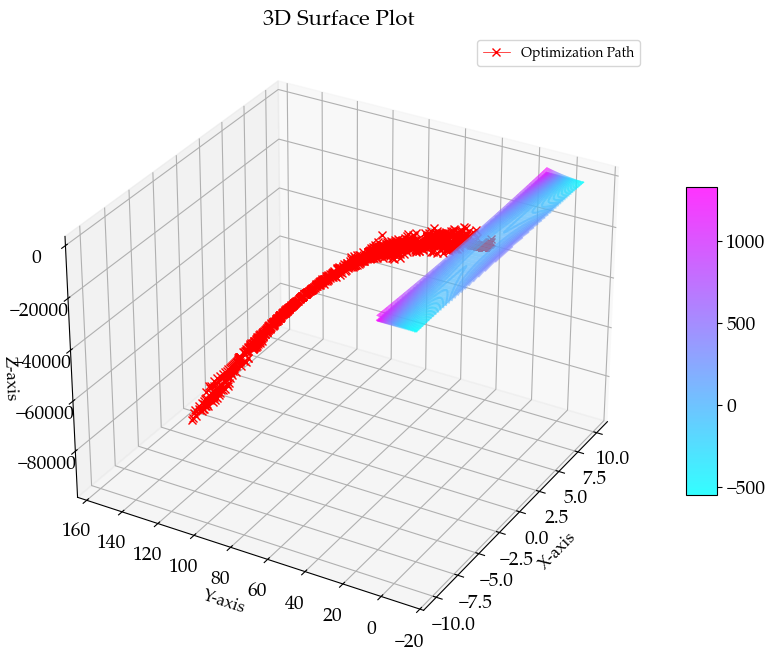

In [7]:

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='cool', edgecolor='none', alpha=0.8)

# Set the viewing angle
ax.view_init(elev=30, azim=210)

# Plot the contour lines
contour = ax.contour(X, Y, Z, zdir='z', offset=np.min(Z), levels=50, cmap='cool', alpha=0.5)

# Calculate the function values for the optimization path
z_path = [func(point) for point in path]

# Plot the optimization path in 3D
ax.plot(path[:, 0], path[:, 1], z_path, color='red', marker='x', linewidth=0.5, label='Optimization Path')

# Add labels and title
ax.set_title("3D Surface Plot", fontsize=16)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('Z-axis', fontsize=12)

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
# Add legend
ax.legend()
plt.show()




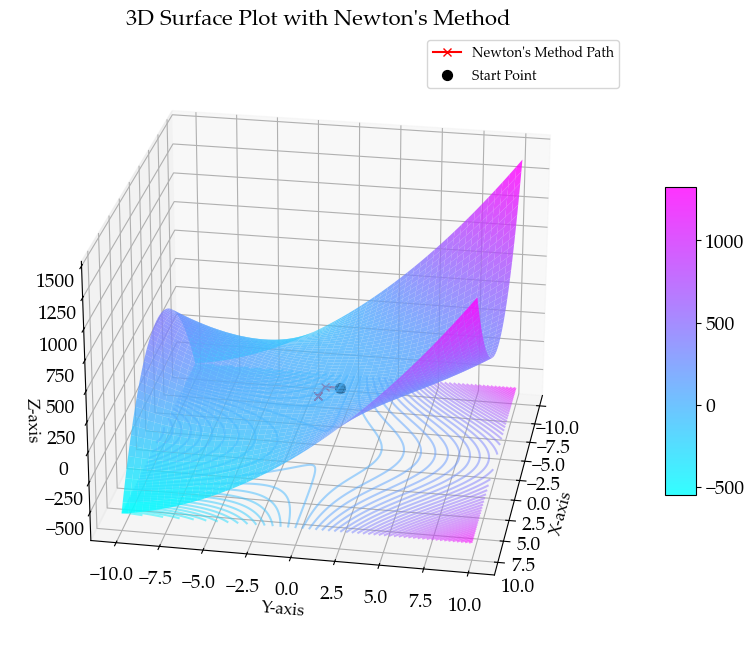

In [8]:
# Calculate the function values for the Newton's Method optimization path
z_path_newton = [func(point) for point in path_newton]

# Plot the optimization path for Newton's Method in 3D
fig_newton = plt.figure(figsize=(10, 8))
ax_newton_3d = fig_newton.add_subplot(111, projection='3d')

# Plot the surface
surf_newton = ax_newton_3d.plot_surface(X, Y, Z, cmap='cool', edgecolor='none', alpha=0.8)

# Set the viewing angle
ax_newton_3d.view_init(elev=25, azim=10)

# Plot the contour lines
contour_newton = ax_newton_3d.contour(X, Y, Z, zdir='z', offset=np.min(Z), levels=50, cmap='cool', alpha=0.5)

# Plot the optimization path in 3D
ax_newton_3d.plot(path_newton[:, 0], path_newton[:, 1], z_path_newton, color='red', marker='x', label="Newton's Method Path")

# Add labels and title
ax_newton_3d.set_title("3D Surface Plot with Newton's Method", fontsize=16)
ax_newton_3d.set_xlabel('X-axis', fontsize=12)
ax_newton_3d.set_ylabel('Y-axis', fontsize=12)
ax_newton_3d.set_zlabel('Z-axis', fontsize=12)

# Add the start point
ax_newton_3d.scatter(x0[0], x0[1], func(x0), color='black', s=50, label='Start Point', zorder=5)

# Add a color bar
fig_newton.colorbar(surf_newton, ax=ax_newton_3d, shrink=0.5, aspect=10)

# Add legend
ax_newton_3d.legend()

plt.show()

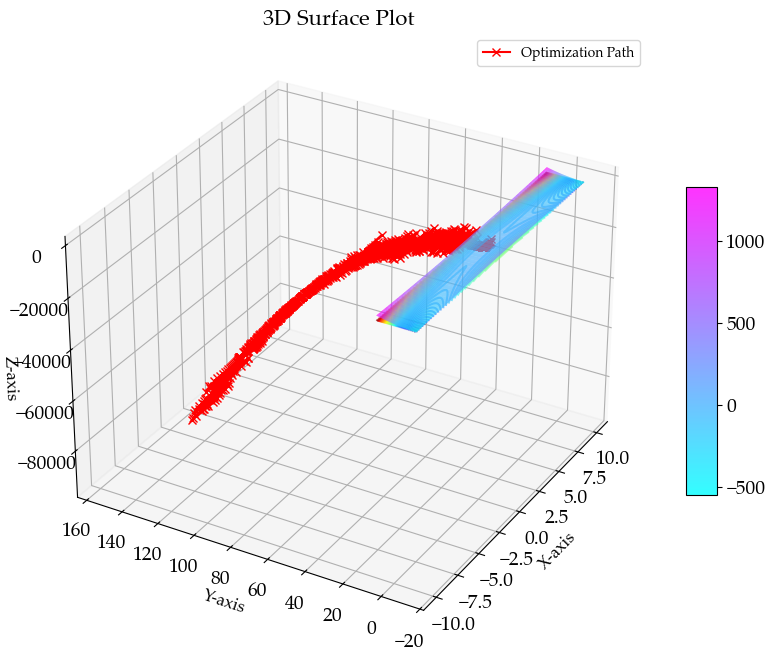

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='cool', edgecolor='none', alpha=0.8)
# Set the viewing angle
ax.view_init(elev=30, azim=210)
# Plot the contour lines
contour = ax.contour(X, Y, Z, zdir='z', offset=np.min(Z), levels=50, cmap='jet', alpha=0.5)
# Calculate the function values for the optimization path
z_path = [func(point) for point in path]
# Plot the optimization path in 3D
ax.plot(path[:, 0], path[:, 1], z_path, color='red', marker='x', label='Optimization Path')
# Add labels and title
ax.set_title("3D Surface Plot", fontsize=16)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('Z-axis', fontsize=12)
# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
# Add legend
ax.legend()
plt.show()



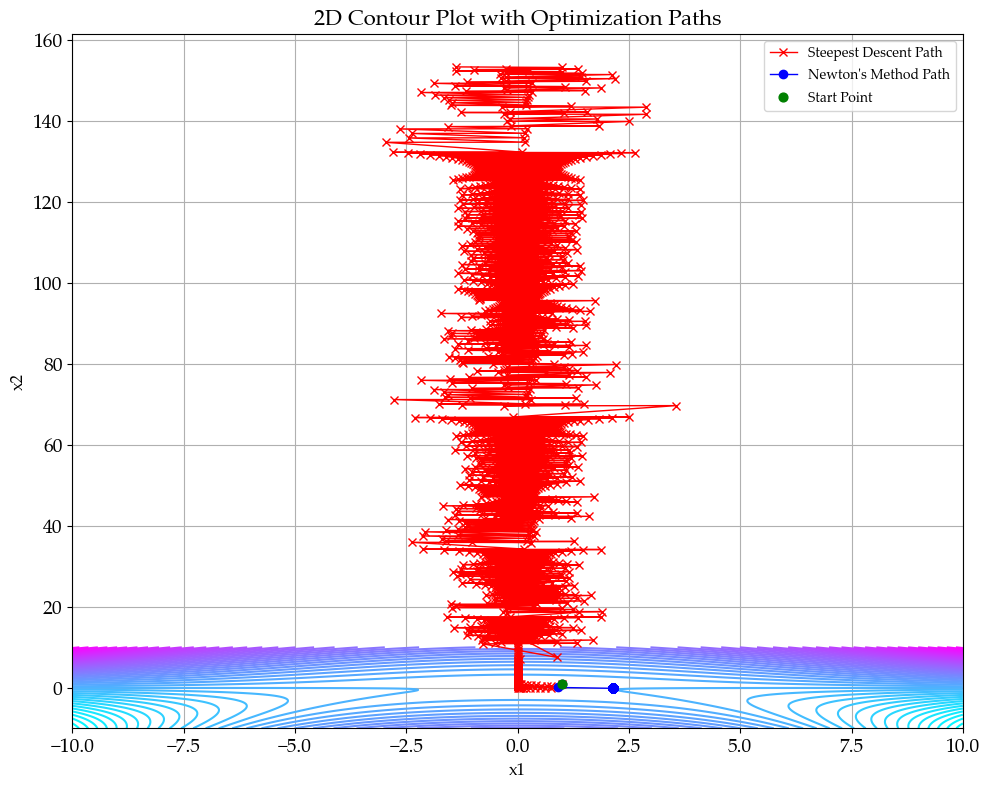

In [10]:
# Create a 2D contour plot with optimization paths
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the contour
CS = ax.contour(X, Y, Z, levels=50, cmap='cool')

# Plot the optimization path for Steepest Descent
ax.plot(path[:, 0], path[:, 1], marker='x', color='red', linewidth=1, label='Steepest Descent Path')

# Plot the optimization path for Newton's Method
ax.plot(path_newton[:, 0], path_newton[:, 1], marker='o', color='blue', linewidth=1, label="Newton's Method Path")

# Add the start point
ax.scatter(x0[0], x0[1], color='green', s=40, label='Start Point', zorder=5)

# Add labels, title, and legend
ax.set_title("2D Contour Plot with Optimization Paths", fontsize=16)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()